In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import seaborn as sns

In [2]:
# Import of the files using pandas
# Import income data
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)

#Solving dataframe issues
income_2016.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2017.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2018.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2020['Nom_Districte']=income_2020['Nom_Districte'].replace('L\'Eixample','Eixample')
income_2020['Nom_Barri']=income_2020['Nom_Barri'].replace('el Barri Gòtic','el Gòtic').replace('Sant Gervasi- Galvany','Sant Gervasi - Galvany').replace('Sant Gervasi- la Bonanova','Sant Gervasi - la Bonanova').replace('Sants-Badal','Sants - Badal')
income_2016['Nom_Barri']=income_2016['Nom_Barri'].replace('el Putget i Farró','el Putxet i el Farró').replace('Vila de Gràcia','la Vila de Gràcia').replace('Camp de l\'Arpa del Clot','el Camp de l\'Arpa del Clot')
income_2017['Nom_Barri']=income_2017['Nom_Barri'].replace('el Putget i Farró','el Putxet i el Farró').replace('Vila de Gràcia','la Vila de Gràcia').replace('Camp de l\'Arpa del Clot','el Camp de l\'Arpa del Clot')
income_2018['Nom_Barri']=income_2018['Nom_Barri'].replace('el Putget i Farró','el Putxet i el Farró').replace('Vila de Gràcia','la Vila de Gràcia').replace('Camp de l\'Arpa del Clot','el Camp de l\'Arpa del Clot')
income_2019['Nom_Barri']=income_2019['Nom_Barri'].replace('el Putget i Farró','el Putxet i el Farró').replace('Vila de Gràcia','la Vila de Gràcia').replace('Camp de l\'Arpa del Clot','el Camp de l\'Arpa del Clot')


In [3]:
#Merging the dataframes of all years into one
incomearray=[income_2016,income_2017,income_2018,income_2019,income_2020]
income_df=pd.concat(incomearray)
income_df.columns

Index(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Seccio_Censal', 'Import_Euros'],
      dtype='object')

In [4]:
#We erase the column about "secció censal" 
income_df.drop('Seccio_Censal', axis=1)
#Preparation for a map plot: we merge all the rows from the same district, taking the mean income for each
income_df_refined=income_df.groupby('Nom_Districte').agg({'Codi_Districte':'mean','Import_Euros': 'mean'}).reset_index()
income_df_refined['Codi_Districte']=income_df_refined['Codi_Districte'].astype(int)

income_df_refined


,Nom_Districte,Codi_Districte,Import_Euros
0,Ciutat Vella,1,11268.029630
1,Eixample,2,18309.000000
2,Gràcia,6,17588.006897
3,Horta-Guinardó,7,14527.138211
4,Les Corts,4,21314.396491
5,Nou Barris,8,11912.095726
6,Sant Andreu,9,14457.814737
7,Sant Martí,10,14664.900680
8,Sants-Montjuïc,3,14010.560684
9,Sarrià-Sant Gervasi,5,25172.730612


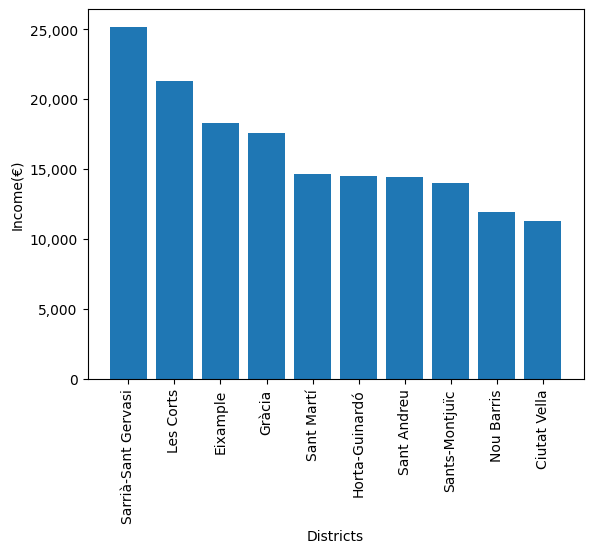

In [5]:
#We make a bar plot to have some intuition on which district is the richest
#(It will not be used)
income_df_refinedforbars=income_df_refined.sort_values('Import_Euros',ascending=False)
plt.bar(income_df_refinedforbars['Nom_Districte'], income_df_refinedforbars['Import_Euros'])
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))#comma for the thousands!
plt.ylabel('Income(€)')
plt.xlabel('Districts')
plt.xticks(rotation=90)
plt.show()

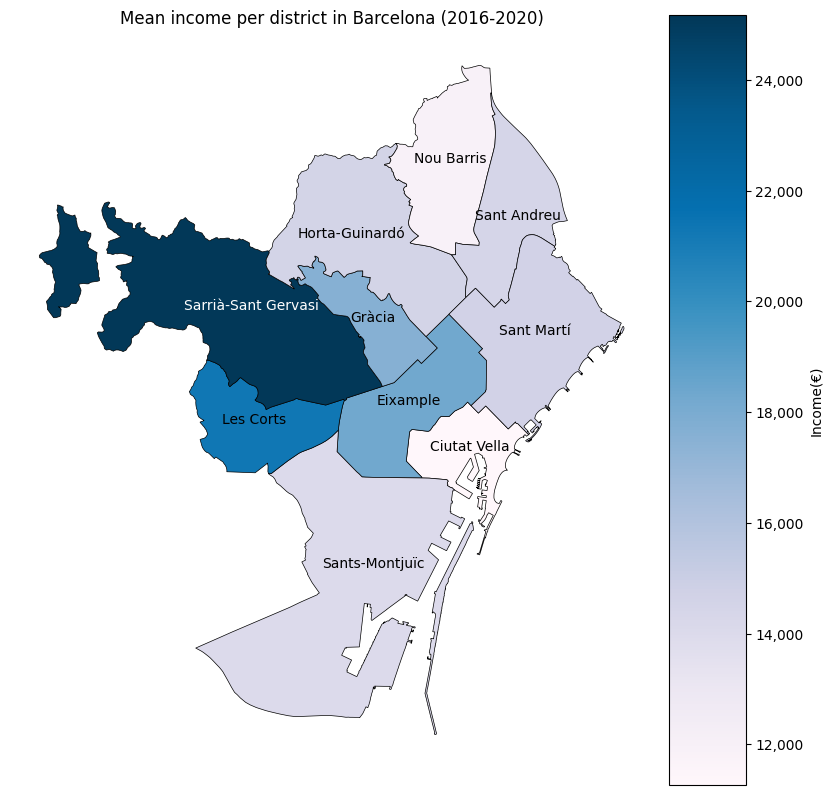

In [6]:
#General map, we read the shp file and make the dataframe
data_dir = 'Data/'
mapofbarcelonadistricts = gpd.read_file(data_dir + "0301040100_Districtes_UNITATS_ADM.shp") 
mapofbarcelonadistricts["DISTRICTE"]=mapofbarcelonadistricts["DISTRICTE"].astype(int)
mapofbarcelonadistrictswincome=mapofbarcelonadistricts.merge(income_df_refined, left_on='DISTRICTE',right_on='Codi_Districte')

#Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
mapofbarcelonadistrictswincome.plot(column='Import_Euros', ax=ax, cmap='PuBu', edgecolor='black', linewidth=0.5)

#Add colorbar and title
cbar = plt.colorbar(ax.collections[0], ax=ax, pad=0.02, aspect=10)
plt.title("Mean income per district in Barcelona (2016-2020)")
cbar.ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))#comma for the thousands!
cbar.ax.set_ylabel("Income(€)")

#Add district names, some repositions of the text were needed
for x, y, label in zip(mapofbarcelonadistrictswincome.geometry.centroid.x, mapofbarcelonadistrictswincome.geometry.centroid.y, mapofbarcelonadistrictswincome['Nom_Districte']):
    if label=='Horta-Guinardó':
        ax.annotate(label, xy=(x, y), xytext=(-50, 0), textcoords='offset points')
    elif label=='Gràcia':
        ax.annotate(label, xy=(x, y), xytext=(-15, 0), textcoords='offset points')
    elif label=='Sants-Montjuïc':
        ax.annotate(label, xy=(x, y), xytext=(-15, 15), textcoords='offset points')
    elif label=='Sant Andreu':
        ax.annotate(label, xy=(x, y), xytext=(-25, -5), textcoords='offset points')
    elif label=='Sarrià-Sant Gervasi':
        ax.annotate(label, xy=(x, y), xytext=(-25, 0), textcoords='offset points',color='white')
    else:      
        ax.annotate(label, xy=(x, y), xytext=(-25, 0), textcoords='offset points')

ax.axis('off')

# Show the plot
plt.show()

In [7]:
#Preparation for a box plot: this time we also want information on the neighborhood, so
#we group the data based on that, once again taking the mean income
income_df_refinedforboxplot=income_df.groupby(['Nom_Districte','Nom_Barri']).agg({'Codi_Districte':'mean','Codi_Barri':'mean','Import_Euros': 'mean'}).reset_index()
income_df_refinedforboxplot['Codi_Districte']=income_df_refinedforboxplot['Codi_Districte'].astype(int)
income_df_refinedforboxplot['Codi_Barri']=income_df_refinedforboxplot['Codi_Barri'].astype(int)

#Little check to see if the neighbourhoods are 73 as indicated in 
#https://ajuntament.barcelona.cat/estadistica/catala/Territori/div84/convertidors/barris73.htm
#(There were a lot of naming issues in the data, so many corrections had to be made as it can be noted in the second code cell)
barris=income_df_refinedforboxplot['Nom_Barri'].dropna().tolist()
print(barris, len(barris))

['Sant Pere, Santa Caterina i la Ribera', 'el Gòtic', 'el Raval', 'la Barceloneta', 'Sant Antoni', 'el Fort Pienc', "l'Antiga Esquerra de l'Eixample", "la Dreta de l'Eixample", "la Nova Esquerra de l'Eixample", 'la Sagrada Família', 'Vallcarca i els Penitents', "el Camp d'en Grassot i Gràcia Nova", 'el Coll', 'la Salut', 'la Vila de Gràcia', 'Can Baró', 'Horta', 'Montbau', 'Sant Genís dels Agudells', 'el Baix Guinardó', 'el Carmel', 'el Guinardó', 'la Clota', "la Font d'en Fargues", 'la Teixonera', "la Vall d'Hebron", 'Pedralbes', 'la Maternitat i Sant Ramon', 'les Corts', 'Can Peguera', 'Canyelles', 'Ciutat Meridiana', 'Porta', 'Torre Baró', 'Vallbona', 'Verdun', 'Vilapicina i la Torre Llobeta', 'el Turó de la Peira', 'la Guineueta', 'la Prosperitat', 'la Trinitat Nova', 'les Roquetes', 'Baró de Viver', 'Navas', 'Sant Andreu', 'el Bon Pastor', 'el Congrés i els Indians', 'la Sagrera', 'la Trinitat Vella', 'Diagonal Mar i el Front Marítim del Poblenou', 'Provençals del Poblenou', 'Sant

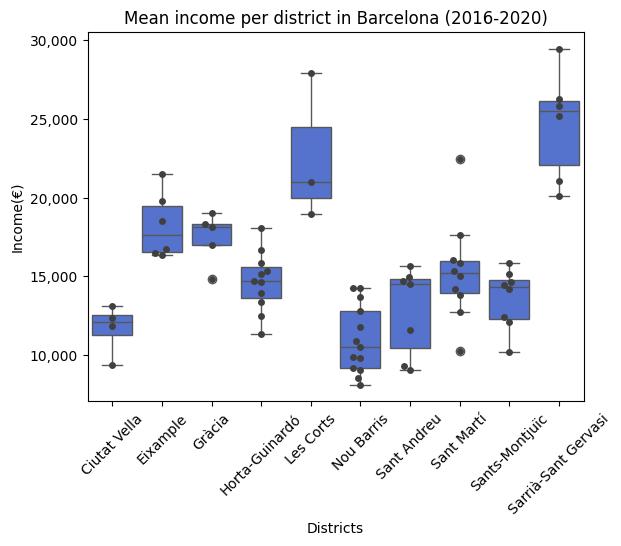

In [8]:
# Create a boxplot
sns.boxplot(x='Nom_Districte', y='Import_Euros', data=income_df_refinedforboxplot,color='royalblue')
# Add swarmplot for individual data points
sns.swarmplot(x='Nom_Districte', y='Import_Euros', data=income_df_refinedforboxplot, color=".25")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))#comma for the thousands!
plt.title("Mean income per district in Barcelona (2016-2020)")
plt.ylabel('Income(€)')
plt.xlabel('Districts')
plt.xticks(rotation=45)
# Show the plot
plt.show()
#Note:The data plotted is the mean income for each neighborhood over the years!!!

In [9]:
#We will search the neighbourhoods with the highest incomes and the ones with the lowest
highestincomes=income_df_refinedforboxplot.nlargest(20,'Import_Euros')
lowestincomes=income_df_refinedforboxplot.nsmallest(20,'Import_Euros')
print(highestincomes)
print(lowestincomes)

          Nom_Districte                                     Nom_Barri  \
72  Sarrià-Sant Gervasi                               les Tres Torres   
26            Les Corts                                     Pedralbes   
67  Sarrià-Sant Gervasi                        Sant Gervasi - Galvany   
68  Sarrià-Sant Gervasi                    Sant Gervasi - la Bonanova   
69  Sarrià-Sant Gervasi                                        Sarrià   
58           Sant Martí                 la Vila Olímpica del Poblenou   
7              Eixample                        la Dreta de l'Eixample   
71  Sarrià-Sant Gervasi                          el Putxet i el Farró   
28            Les Corts                                     les Corts   
70  Sarrià-Sant Gervasi         Vallvidrera, el Tibidabo i les Planes   
6              Eixample               l'Antiga Esquerra de l'Eixample   
10               Gràcia                     Vallcarca i els Penitents   
27            Les Corts                    la Mater